##Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

##Importing the Dataset

In [2]:
df = pd.read_csv('drag_coef.csv')

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Detecting Outliers by Discrete Variables on Testset

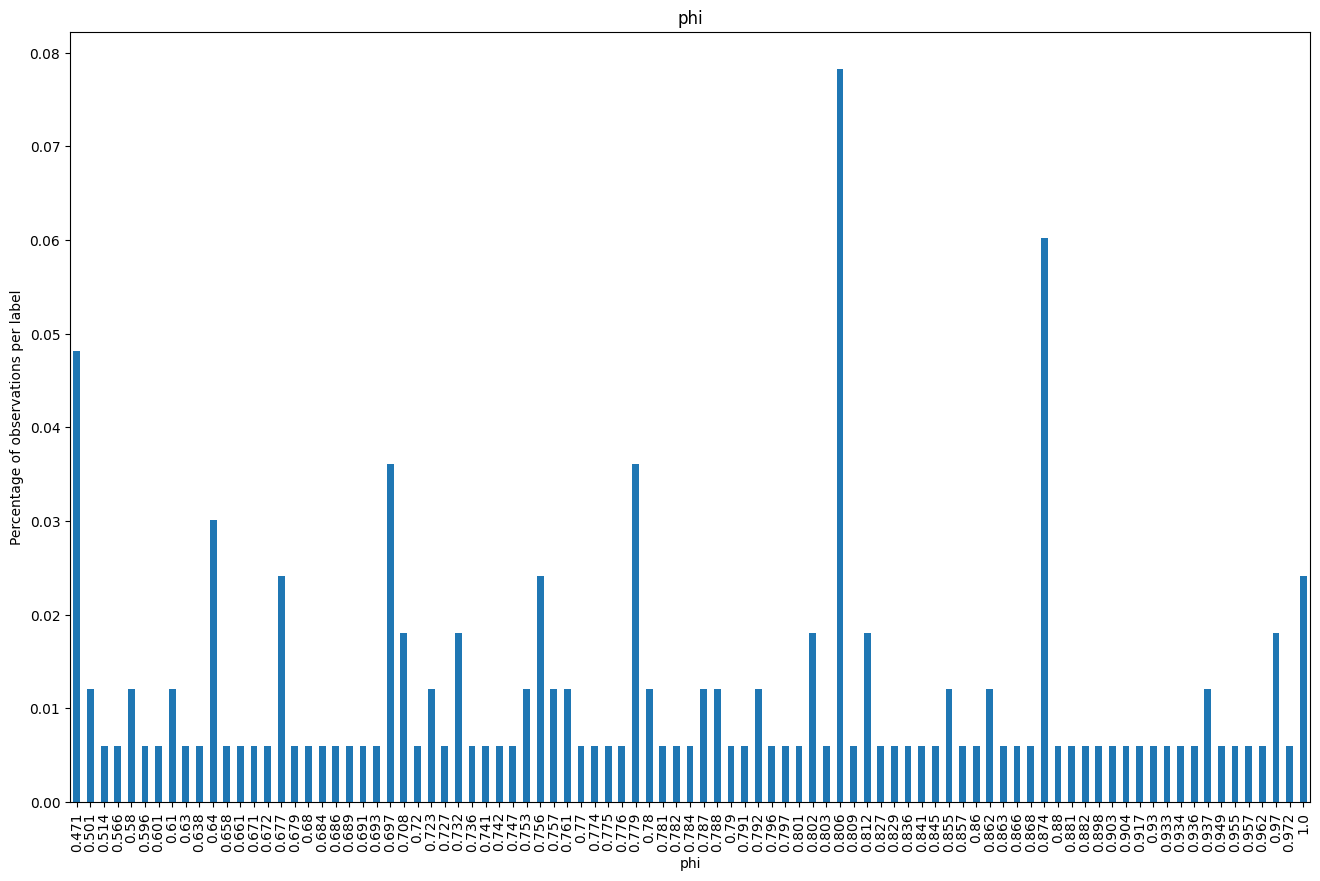

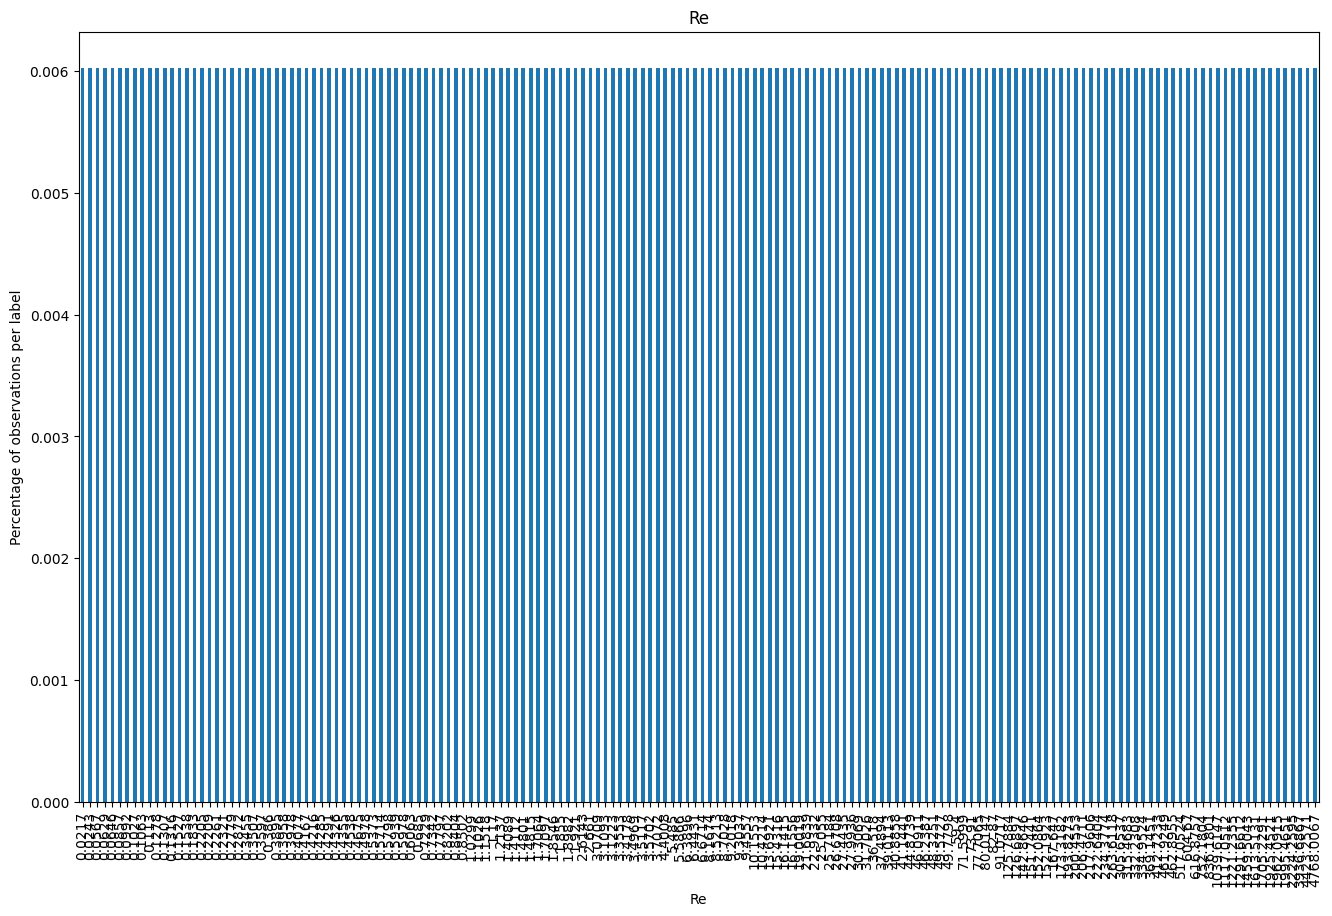

In [4]:
X_test_df = pd.DataFrame(X_test, columns=['phi', 'Re'])

for var in ['phi', 'Re']:
    plt.figure(figsize=(16,10))
    (X_test_df.groupby(var)[var].count() / float(len(X_test_df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

##Detecting the Outliers by Interquartile Range Method

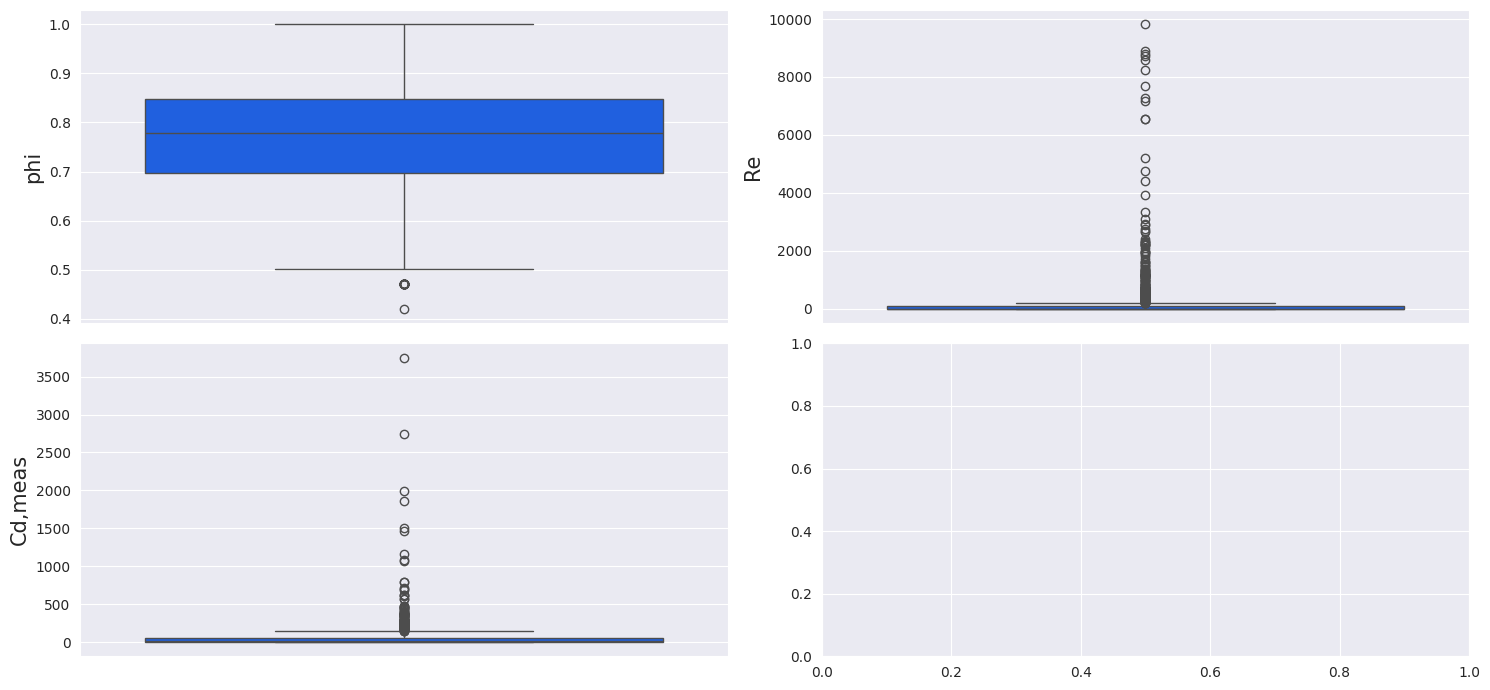

In [14]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values,
                              df.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(2, 2, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//2
    y = i%2
    if i<5:
        sns.boxplot(data=df, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='C_d_exp', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()
plt.show()

In [6]:
outliers_indexes = []
target = 'C_d_exp'

for col in df.select_dtypes(include='object').columns:
    for cat in df[col].unique():
        df1 = df[df[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())


for col in df.select_dtypes(exclude='object').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = df[(df[col] < minimum) | (df[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())

outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

296 outliers were identified, whose indices are:

[512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 96, 101, 106, 111, 627, 628, 629, 630, 631, 633, 634, 635, 636, 637, 638, 639, 126, 130, 5, 134, 651, 652, 653, 654, 655, 657, 658, 659, 660, 661, 662, 663, 0, 162, 163, 677, 678, 167, 679, 682, 683, 684, 686, 176, 688, 689, 690, 691, 692, 693, 694, 706, 708, 710, 713, 714, 204, 209, 214, 219, 736, 737, 45, 739, 46, 744, 50, 763, 49, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267

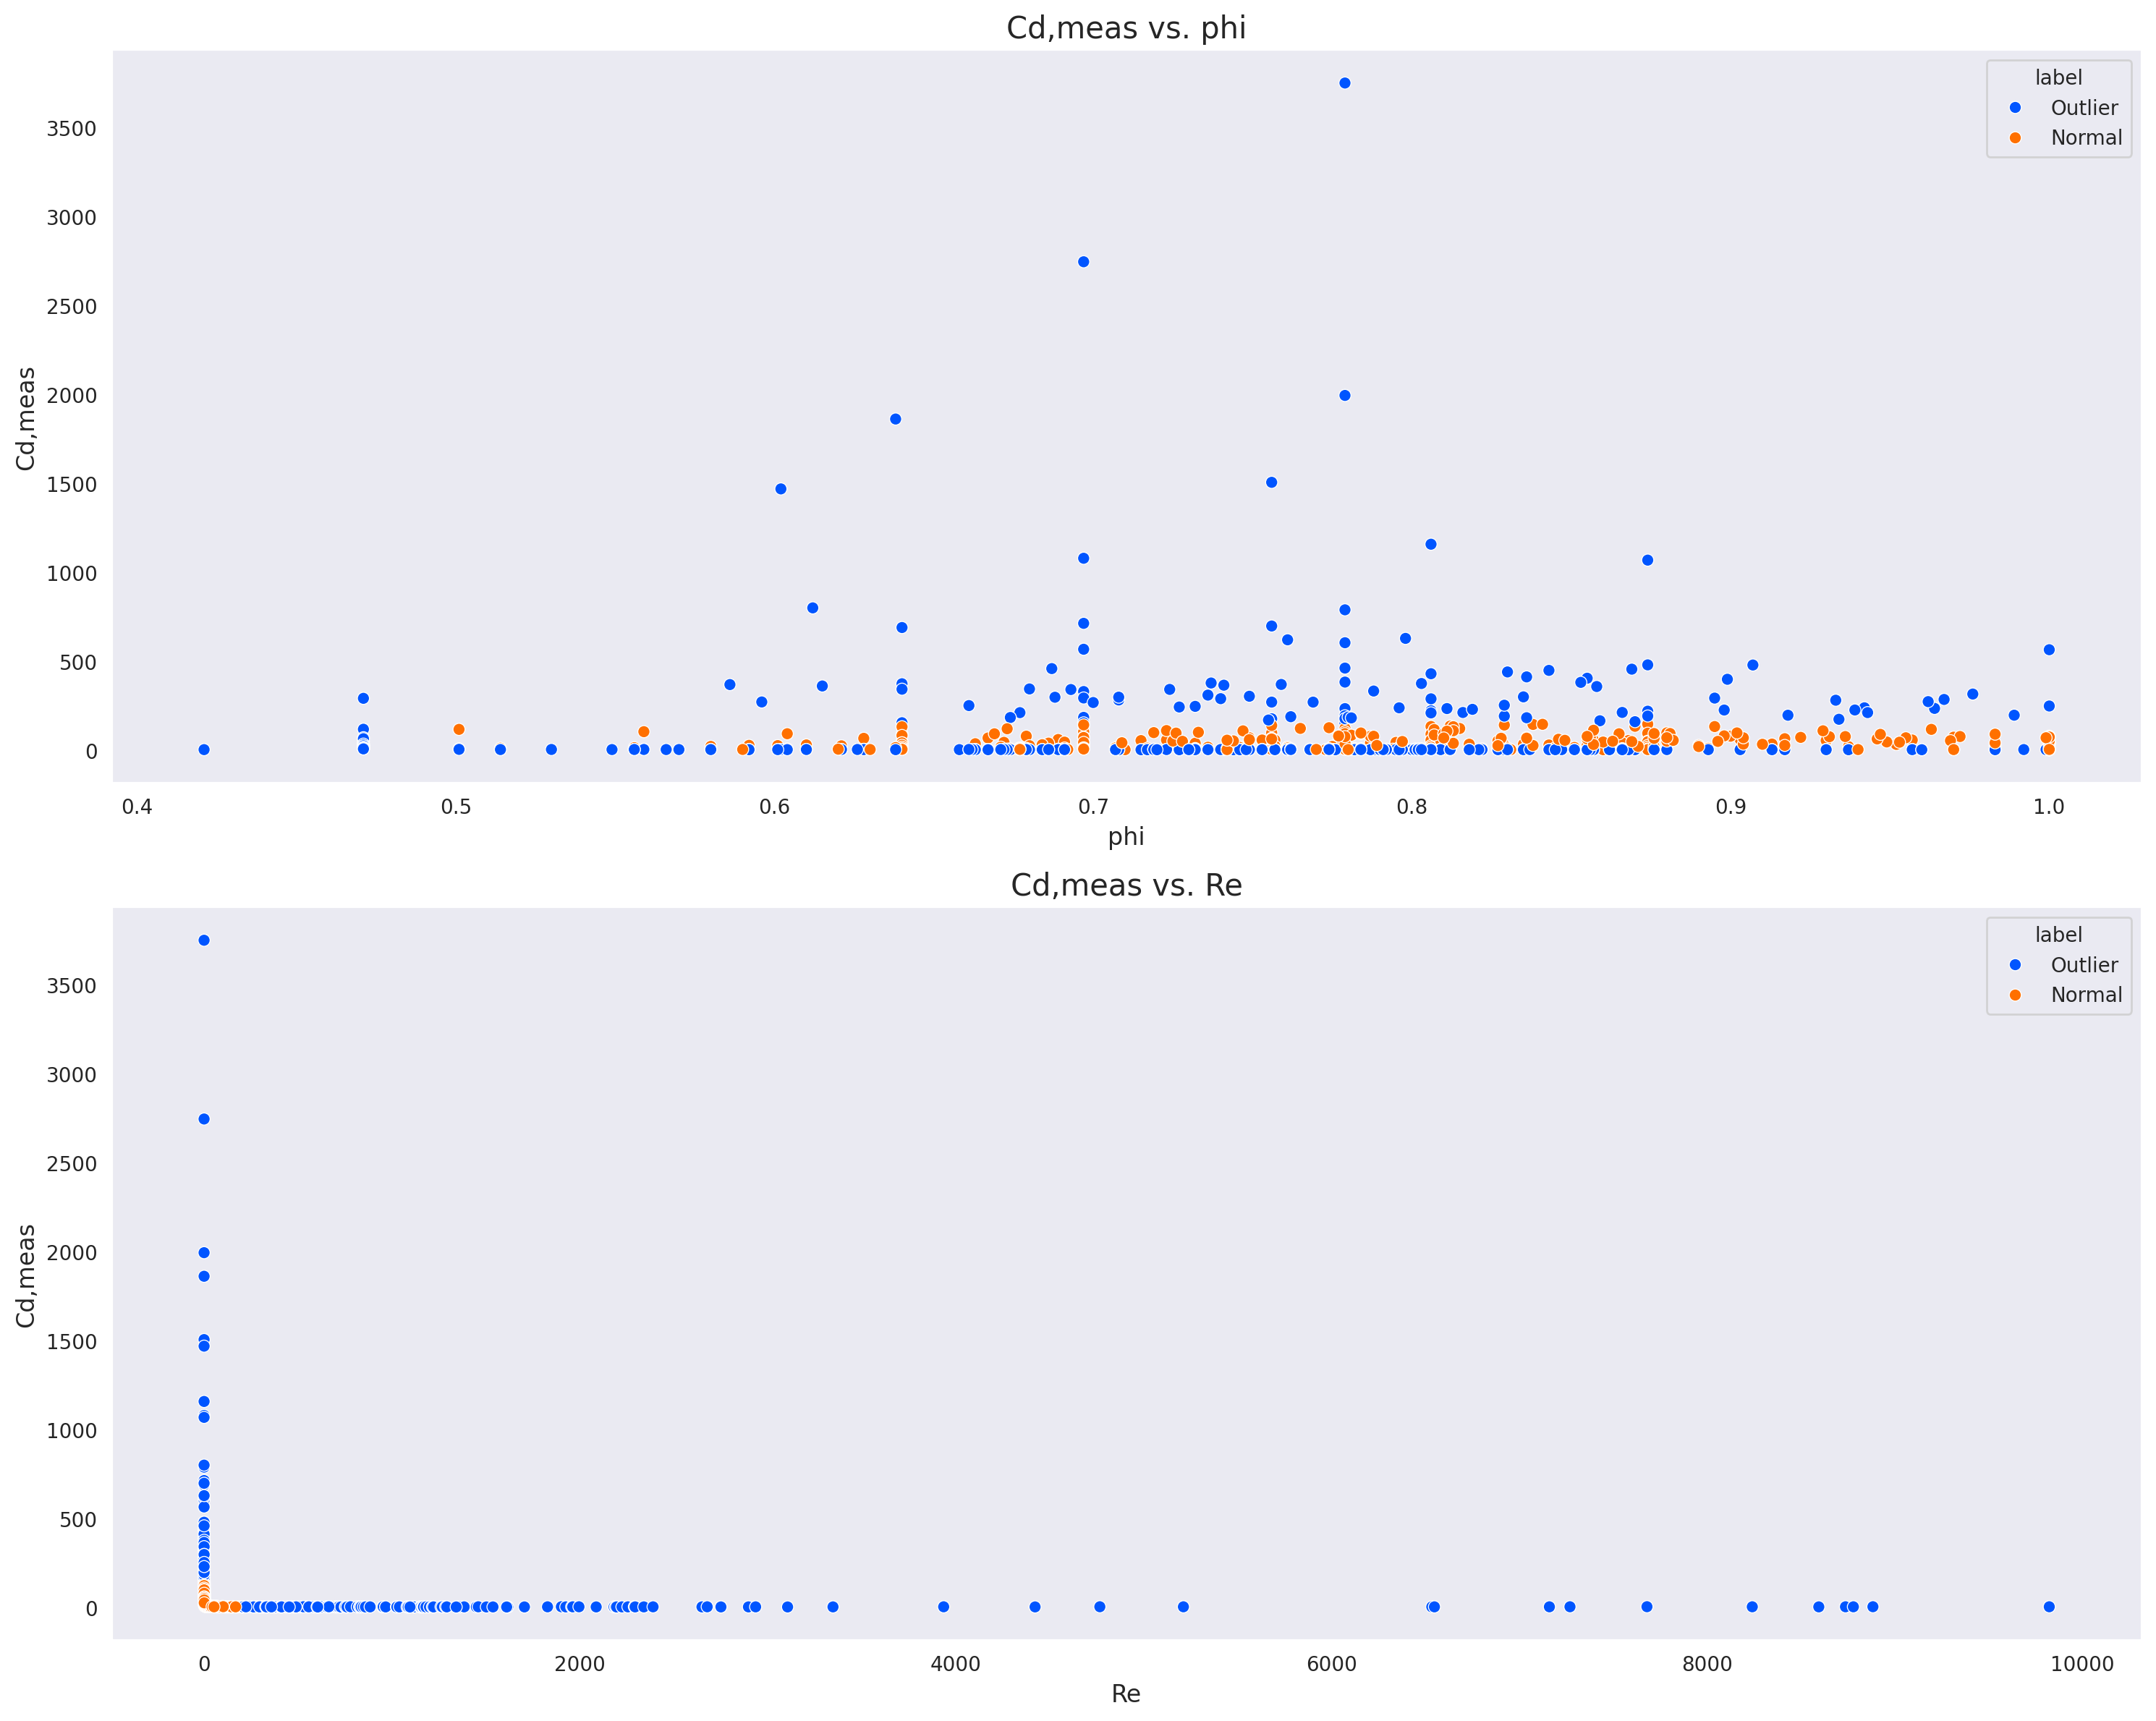

In [12]:
# Outliers Labeling
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'

# Plot
target = 'Cd,meas'
features = df.columns.drop(target)
colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=len(features) ,ncols=1, figsize=(15,12), dpi=200)

for i in range(len(features)):
    sns.scatterplot(data=df1, x=features[i], y=target, hue='label', ax=ax[i]) # Modified this line
    ax[i].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[i].set_xlabel(features[i], size = 12)
    ax[i].set_ylabel(target, size = 12)
    ax[i].grid()

plt.tight_layout()
plt.show()
